In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df1 = pd.read_csv('C:/Users/trisha ghali/OneDrive/Desktop/college/Analog_data.csv')

In [51]:
df1.head()

,ID,Diagnosis,Img-Min,Img-Avg,Real-Min,Real-Avg,Gender,Age,Smoking
0,301-4,1,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,302-3,1,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,303-3,1,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,304-4,1,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,305-4,1,-325.39,-316.155785,-478.52,-472.869783,0,65,2


In [52]:
df=df1.drop(columns=['ID'])

In [53]:
df.head()

,Diagnosis,Img-Min,Img-Avg,Real-Min,Real-Avg,Gender,Age,Smoking
0,1,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,1,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,1,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,1,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,1,-325.39,-316.155785,-478.52,-472.869783,0,65,2


In [54]:
df.isnull().any()

Diagnosis    False
Img-Min      False
Img-Avg      False
Real-Min     False
Real-Avg     False
Gender       False
Age          False
Smoking      False
dtype: bool

In [55]:
df.head()

,Diagnosis,Img-Min,Img-Avg,Real-Min,Real-Avg,Gender,Age,Smoking
0,1,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,1,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,1,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,1,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,1,-325.39,-316.155785,-478.52,-472.869783,0,65,2


In [56]:
df.isnull().any()

Diagnosis    False
Img-Min      False
Img-Avg      False
Real-Min     False
Real-Avg     False
Gender       False
Age          False
Smoking      False
dtype: bool

<AxesSubplot:>

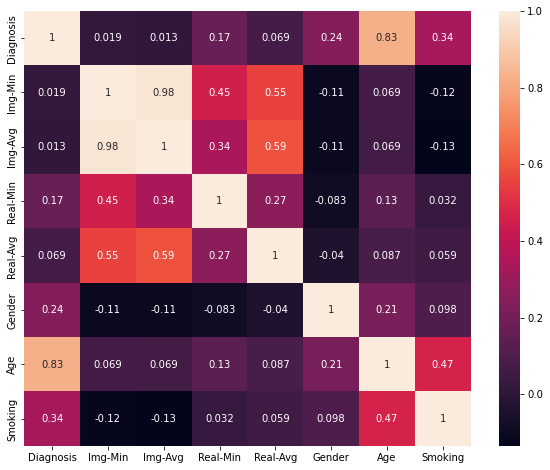

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x=df.drop(columns=['Diagnosis'])

In [60]:
x.head()

,Img-Min,Img-Avg,Real-Min,Real-Avg,Gender,Age,Smoking
0,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,-325.39,-316.155785,-478.52,-472.869783,0,65,2


In [61]:
y=df1.Diagnosis

In [62]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [63]:
y.tail()

75    0
76    0
77    0
78    0
79    0
Name: Diagnosis, dtype: int64

In [64]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [65]:
scaled_x=pd.DataFrame(scale.fit_transform(x))

In [66]:
scaled_x

,0,1,2,3,4,5,6
0,0.148999,0.268369,0.708060,0.152779,1.0,0.786667,0.5
1,0.106453,0.131008,0.823900,0.073057,0.0,0.720000,0.5
2,0.127726,0.105004,0.811041,0.031804,1.0,0.733333,1.0
3,0.085180,0.105356,0.823900,0.079427,1.0,0.773333,0.5
4,0.106453,0.117400,0.798128,0.016581,0.0,0.626667,0.5
...,...,...,...,...,...,...,...
75,0.902092,0.893494,0.973098,0.437331,0.0,0.320000,0.5
76,0.919893,0.912859,0.978478,0.452990,0.0,0.106667,0.0
77,0.902092,0.893494,0.962337,0.406014,0.0,0.066667,0.0
78,0.910992,0.903177,0.967718,0.421673,1.0,0.560000,0.5


In [67]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=0 )

In [68]:
x_train.shape

(64, 7)

In [69]:
x_test.shape

(16, 7)

In [70]:
y_train.shape

(64,)

In [71]:
y_test.shape

(16,)

# LR

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [73]:
lr.fit(x_train,y_train)

LogisticRegression()

In [74]:
pred = lr.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [76]:

accuracy_score(y_test,pred)

0.875

In [77]:
confusion_matrix(y_test,pred)

array([[11,  1],
       [ 1,  3]], dtype=int64)

In [78]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.75      0.75      0.75         4

    accuracy                           0.88        16
   macro avg       0.83      0.83      0.83        16
weighted avg       0.88      0.88      0.88        16



# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn=KNeighborsClassifier() 

In [81]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [82]:
pred = knn.predict(x_test)

In [83]:
acc = accuracy_score(y_test,pred)

In [84]:
acc

0.8125

In [85]:
conm=confusion_matrix(y_test,pred)
conm

array([[10,  2],
       [ 1,  3]], dtype=int64)

In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.60      0.75      0.67         4

    accuracy                           0.81        16
   macro avg       0.75      0.79      0.77        16
weighted avg       0.83      0.81      0.82        16



# XGB

In [87]:
import xgboost as xgb

In [88]:
xg= xgb.XGBClassifier(n_estimators=10)

In [89]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [90]:
pred=xg.predict(x_test)

In [91]:
accuracy_score(y_test,pred)

0.9375

In [94]:
conm=confusion_matrix(y_test,pred)
conm

array([[12,  0],
       [ 1,  3]], dtype=int64)

In [95]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.75      0.86         4

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.91        16
weighted avg       0.94      0.94      0.93        16



# ANN

In [93]:
import numpy as np
import tensorflow as tf

# Split a portion of training data for validation
validation_split = 0.2  # 20% of the training data will be used for validation
num_samples = x_train.shape[0]
num_validation_samples = int(validation_split * num_samples)

x_val = x_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]

x_train = x_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]

# Define the ANN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation data
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


Epoch 1/100
2/2 [==============================] - 1s 141ms/step - loss: 0.6751 - accuracy: 0.5714 - val_loss: 0.6794 - val_accuracy: 0.6000
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6532 - accuracy: 0.5714 - val_loss: 0.6737 - val_accuracy: 0.6000
Epoch 3/100
2/2 [==============================] - 0s 30ms/step - loss: 0.6457 - accuracy: 0.5714 - val_loss: 0.6703 - val_accuracy: 0.6000
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 0.6399 - accuracy: 0.5714 - val_loss: 0.6682 - val_accuracy: 0.6000
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6325 - accuracy: 0.5714 - val_loss: 0.6648 - val_accuracy: 0.6000
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6276 - accuracy: 0.5952 - val_loss: 0.6586 - val_accuracy: 0.6000
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6220 - accuracy: 0.7143 - val_loss: 0.6561 - val_accuracy: 0.6000
Epoch 8/100
2/2 [==

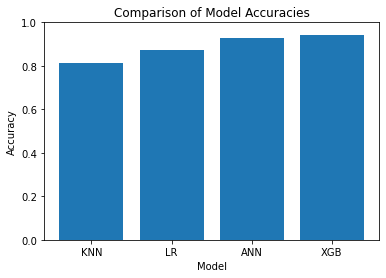

In [4]:
import matplotlib.pyplot as plt

# Example data (replace these with your model names and accuracies)
model_names = ['KNN', 'LR', 'ANN', 'XGB']
accuracies = [0.8125, 0.875, 0.93, 0.94]

# Plot the data
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy values
plt.show()
